<a href="https://colab.research.google.com/github/sirfara12/PCVK25_3G_26/blob/main/Week7_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **D. PRAKTIKUM FILTER**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

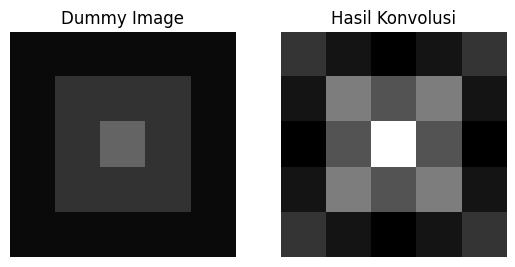

Image:
 [[ 10.  10.  10.  10.  10.]
 [ 10.  50.  50.  50.  10.]
 [ 10.  50. 100.  50.  10.]
 [ 10.  50.  50.  50.  10.]
 [ 10.  10.  10.  10.  10.]]
Hasil Konvolusi:
 [[ 10. -50. -90. -50.  10.]
 [-50. 150.  70. 150. -50.]
 [-90.  70. 400.  70. -90.]
 [-50. 150.  70. 150. -50.]
 [ 10. -50. -90. -50.  10.]]


In [ ]:
#C

def convolution2d(image, kernel, stride=1, padding=0):
    k_h, k_w = kernel.shape
    kernel = np.flipud(np.fliplr(kernel))
    if padding > 0:
        image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    else:
        image_padded = image.copy()

    i_h, i_w = image_padded.shape
    out_h = (i_h - k_h) // stride + 1
    out_w = (i_w - k_w) // stride + 1
    output = np.zeros((out_h, out_w))

    for y in range(0, out_h):
        for x in range(0, out_w):
            region = image_padded[y*stride:y*stride+k_h, x*stride:x*stride+k_w]
            output[y, x] = np.sum(region * kernel)

    return output

image = np.array([[10, 10, 10, 10, 10],
                  [10, 50, 50, 50, 10],
                  [10, 50,100, 50, 10],
                  [10, 50, 50, 50, 10],
                  [10, 10, 10, 10, 10]], dtype=np.float32)

kernel = np.array([[ -1, -1, -1],
                   [ -1,  8, -1],
                   [ -1, -1, -1]])

result = convolution2d(image, kernel, stride=1, padding=1)

plt.subplot(1,2,1)
plt.title("Dummy Image")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Hasil Konvolusi")
plt.imshow(result, cmap='gray')
plt.axis('off')

plt.show()

print("Image:\n", image)
print("Hasil Konvolusi:\n", result)


Ukuran citra: (512, 512)


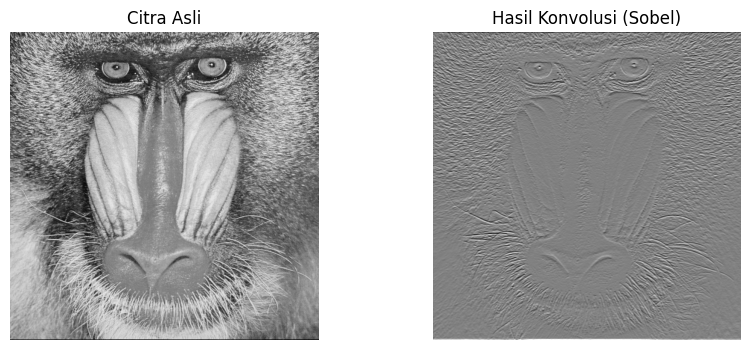

In [ ]:
#D

def convolution2d(image, kernel, stride=1, padding=0):
    k_h, k_w = kernel.shape
    kernel = np.flipud(np.fliplr(kernel))
    if padding > 0:
        image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    else:
        image_padded = image.copy()

    i_h, i_w = image_padded.shape
    out_h = (i_h - k_h) // stride + 1
    out_w = (i_w - k_w) // stride + 1
    output = np.zeros((out_h, out_w))

    for y in range(0, out_h):
        for x in range(0, out_w):
            region = image_padded[y*stride:y*stride+k_h, x*stride:x*stride+k_w]
            output[y, x] = np.sum(region * kernel)

    return output

img = cv.imread("/content/drive/MyDrive/SEMESTER 5/PCVK/mandrill.tiff", cv.IMREAD_GRAYSCALE)
print("Ukuran citra:", img.shape)

kernel = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]])

result = convolution2d(img, kernel, stride=1, padding=1)
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("Citra Asli")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Hasil Konvolusi (Sobel)")
plt.imshow(result, cmap='gray')
plt.axis('off')

plt.show()


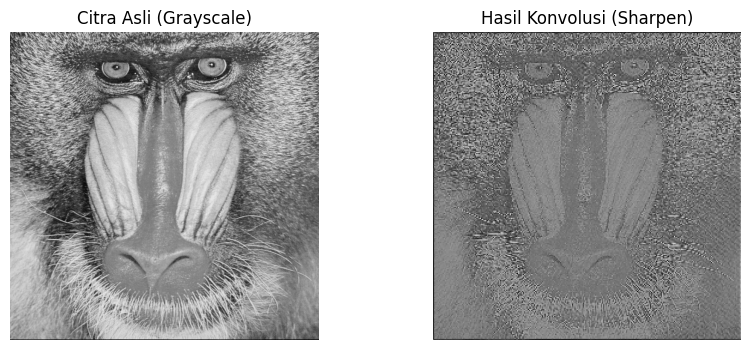

In [ ]:
# E
def convolution2d(image, kernel, stride=1, padding=0):
    k_h, k_w = kernel.shape
    kernel = np.flipud(np.fliplr(kernel))
    if padding > 0:
        image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    else:
        image_padded = image.copy()

    i_h, i_w = image_padded.shape
    out_h = (i_h - k_h) // stride + 1
    out_w = (i_w - k_w) // stride + 1
    output = np.zeros((out_h, out_w))

    for y in range(0, out_h):
        for x in range(0, out_w):
            region = image_padded[y*stride:y*stride+k_h, x*stride:x*stride+k_w]
            output[y, x] = np.sum(region * kernel)

    return output

kernel_sharpen = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])

img_gray = cv.imread("/content/drive/MyDrive/SEMESTER 5/PCVK/mandrill.tiff", cv.IMREAD_GRAYSCALE)

result = convolution2d(img_gray, kernel_sharpen, stride=2, padding=2)
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("Citra Asli (Grayscale)")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Hasil Konvolusi (Sharpen)")
plt.imshow(result, cmap='gray')
plt.axis('off')

plt.show()


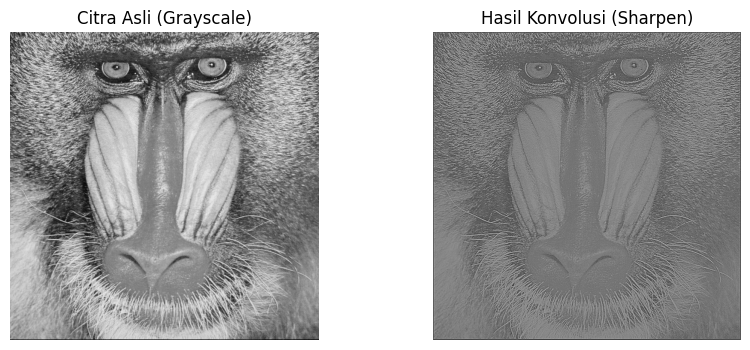

In [ ]:
# F
def convolution2d(image, kernel, stride=1, padding=0):
    k_h, k_w = kernel.shape
    kernel = np.flipud(np.fliplr(kernel))
    if padding > 0:
        image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    else:
        image_padded = image.copy()

    i_h, i_w = image_padded.shape
    out_h = (i_h - k_h) // stride + 1
    out_w = (i_w - k_w) // stride + 1
    output = np.zeros((out_h, out_w))

    for y in range(0, out_h):
        for x in range(0, out_w):
            region = image_padded[y*stride:y*stride+k_h, x*stride:x*stride+k_w]
            output[y, x] = np.sum(region * kernel)

    return output

kernel_sharpen = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])

img_gray = cv.imread("/content/drive/MyDrive/SEMESTER 5/PCVK/mandrill.tiff", cv.IMREAD_GRAYSCALE)

result = convolution2d(img_gray, kernel_sharpen, stride=1, padding=2)
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("Citra Asli (Grayscale)")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Hasil Konvolusi (Sharpen)")
plt.imshow(result, cmap='gray')
plt.axis('off')

plt.show()


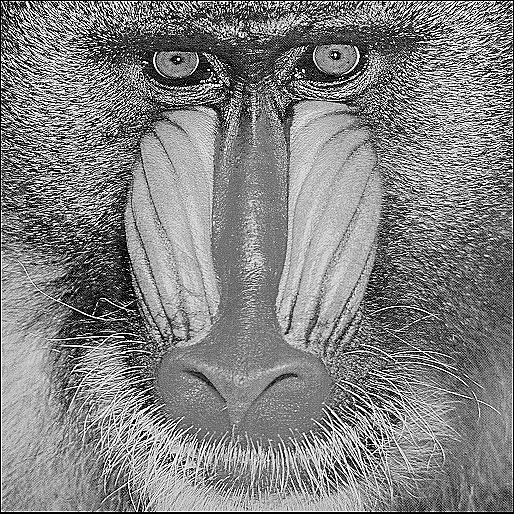

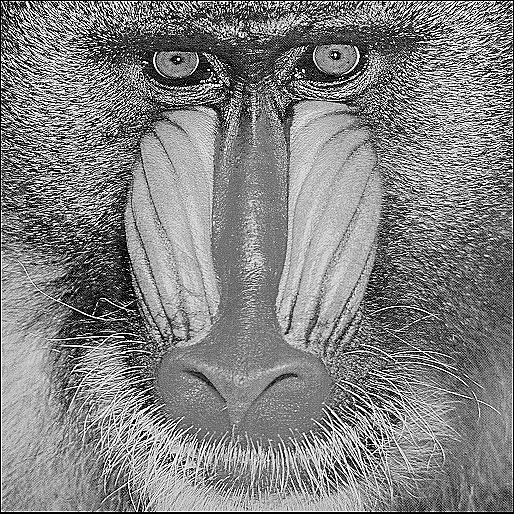

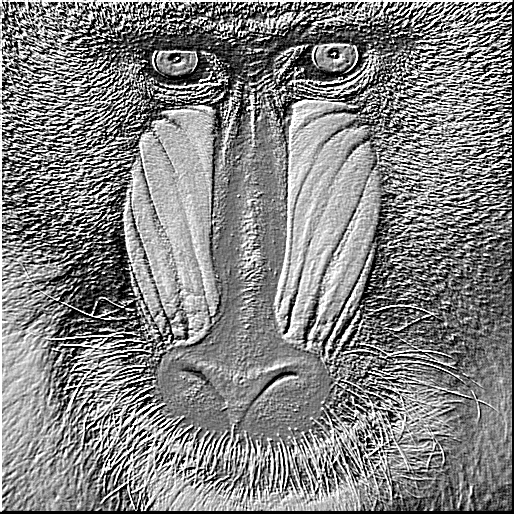

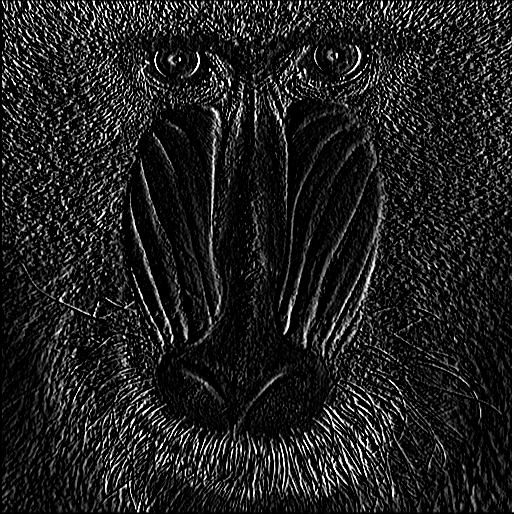

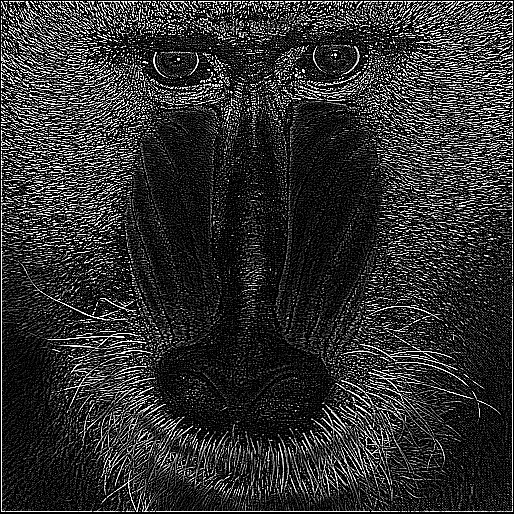

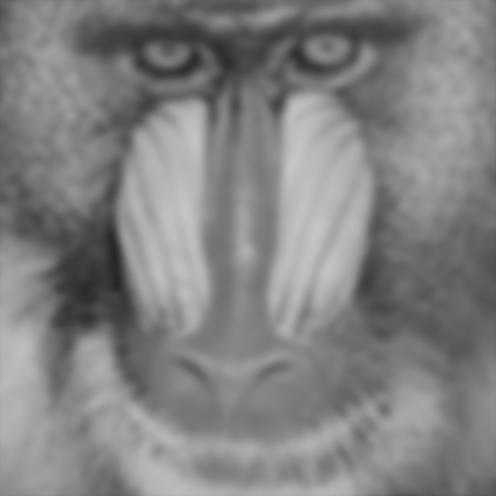

In [ ]:
# 3
def convolution2d(image, kernel, stride, padding):
  image = np.pad(image, padding, mode='constant', constant_values=0)
  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape
  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1
  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution 2d
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
  return new_image

img = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/mandrill.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#image sharpen
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

cv2_imshow(convolution2d(img_gray,kernel_sharpen,1,2))



# Sharpen
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

cv2_imshow(convolution2d(img_gray,kernel_sharpen,1,2))

# Emboss
kernel_emboss = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])

cv2_imshow(convolution2d(img_gray,kernel_emboss,1,2))


# Left Sobel Edge Detection
kernel_leftsobel = np.array([[1,0,-1],
                             [2,0,-2],
                             [1,0,-1]])

cv2_imshow(convolution2d(img_gray,kernel_leftsobel,1,2))

# Canny Edge Detection
kernel_canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])

cv2_imshow(convolution2d(img_gray,kernel_canny,1,2))


# 21x21 Gaussian Blur

kernel_size = 21
sigma=math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size,sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray,gauss_kernel,1,2))

## **E. FILTER LIBRARY DAN FILTER MODERN**

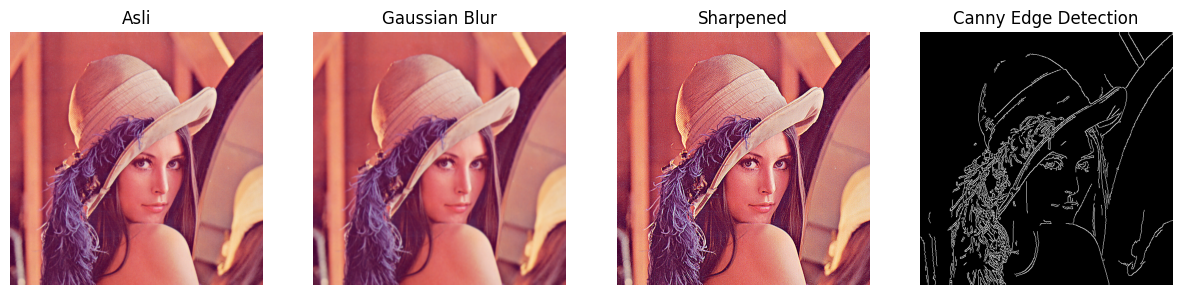

In [ ]:
#PERCOBAAN 1

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan beberapa gambar berdampingan
def show_side_by_side(images, titles, figsize=(15,5)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        if len(img.shape) == 2:  # grayscale
            plt.subplot(1, len(images), i+1)
            plt.imshow(img, cmap="gray")
        else:  # color
            plt.subplot(1, len(images), i+1)
            plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
    plt.show()

# --- Baca gambar ---
img = cv.imread("/content/drive/MyDrive/SEMESTER 5/PCVK/Lenna.png")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# --- Filter Gaussian ---
blur = cv.GaussianBlur(img, (7,7), 1)

# --- Filter Canny (edge detection) ---
edges = cv.Canny(img_gray, 100, 200)

# --- Filter Sharpen (pakai kernel custom + filter2D) ---
sharpen_kernel = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])
sharpened = cv.filter2D(img, -1, sharpen_kernel)

# --- Tampilkan berdampingan ---
show_side_by_side(
    [img, blur, sharpened, edges],
    ["Asli", "Gaussian Blur", "Sharpened", "Canny Edge Detection"]
)



In [ ]:
!pip install opencv-contrib-python==4.5.5.64


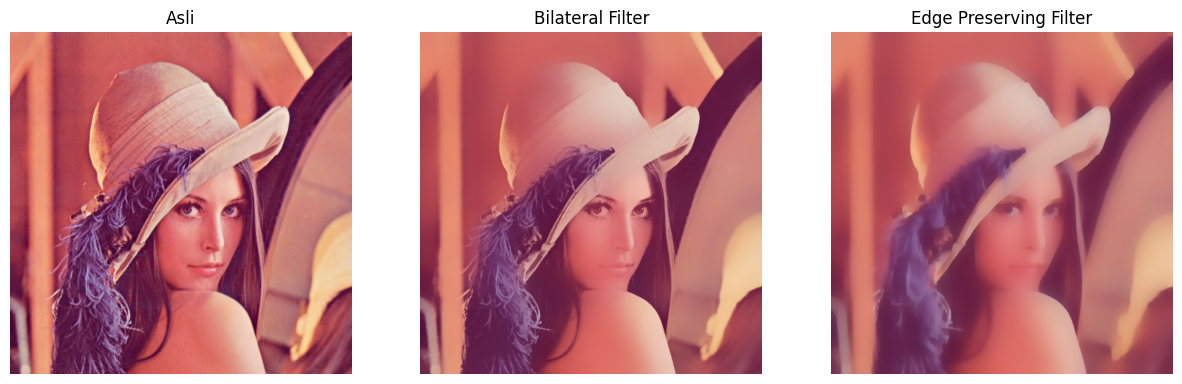

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

# Fungsi tampil berdampingan
def show_side_by_side(images, titles, figsize=(15,5)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        if len(img.shape) == 2:  # grayscale
            plt.subplot(1, len(images), i+1)
            plt.imshow(img, cmap="gray")
        else:  # color
            plt.subplot(1, len(images), i+1)
            plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
    plt.show()

img = cv.imread("/content/drive/MyDrive/SEMESTER 5/PCVK/Lenna.png")

# Bilateral Filter (edge-preserving)
bilateral = cv.bilateralFilter(img, 50, 100, 100)

# Edge Preserving Filter (alternatif Guided Filter)
edge_preserve = cv.edgePreservingFilter(img, flags=1, sigma_s=100, sigma_r=0.9)

show_side_by_side(
    [img, bilateral, edge_preserve],
    ["Asli", "Bilateral Filter", "Edge Preserving Filter"]
)


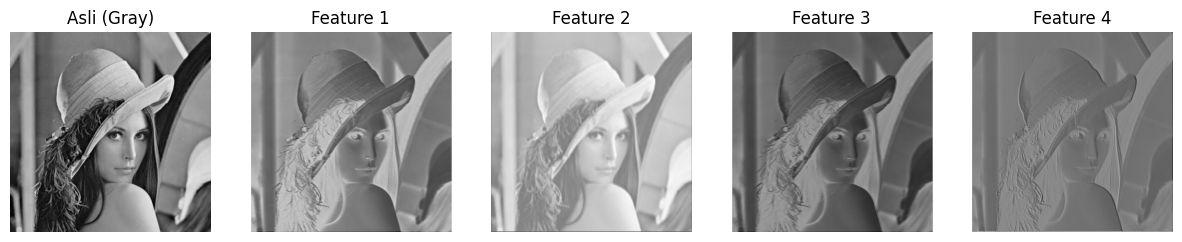

In [ ]:
#PERCOBAAN 3
import torch
import torch.nn as nn
import cv2
import matplotlib.pyplot as plt

def show_side_by_side(images, titles, figsize=(15,5)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        if len(img.shape) == 2:  # grayscale
            plt.subplot(1, len(images), i+1)
            plt.imshow(img, cmap="gray")
        else:
            plt.subplot(1, len(images), i+1)
            plt.imshow(img)
        plt.title(title)
        plt.axis("off")
    plt.show()

img = cv2.imread("/content/drive/MyDrive/SEMESTER 5/PCVK/Lenna.png", cv2.IMREAD_GRAYSCALE)

# Definisi CNN sederhana (1 layer convolution)
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, stride=1, padding=1)
    def forward(self, x):
        return self.conv1(x)

#  model CNN
model = SimpleCNN()

# Ubah gambar ke tensor PyTorch
img_tensor = torch.tensor(img, dtype=torch.float32).unsqueeze(0).unsqueeze(0) / 255.0
# shape: (1,1,H,W) -> batch=1, channel=1

# Hitung feature maps
with torch.no_grad():
    features = model(img_tensor)

# Visualisasi feature maps
feature_maps = [features[0,i].numpy() for i in range(features.shape[1])]
show_side_by_side([img] + feature_maps,
                  ["Asli (Gray)"] + [f"Feature {i+1}" for i in range(len(feature_maps))],
                  figsize=(15,5))


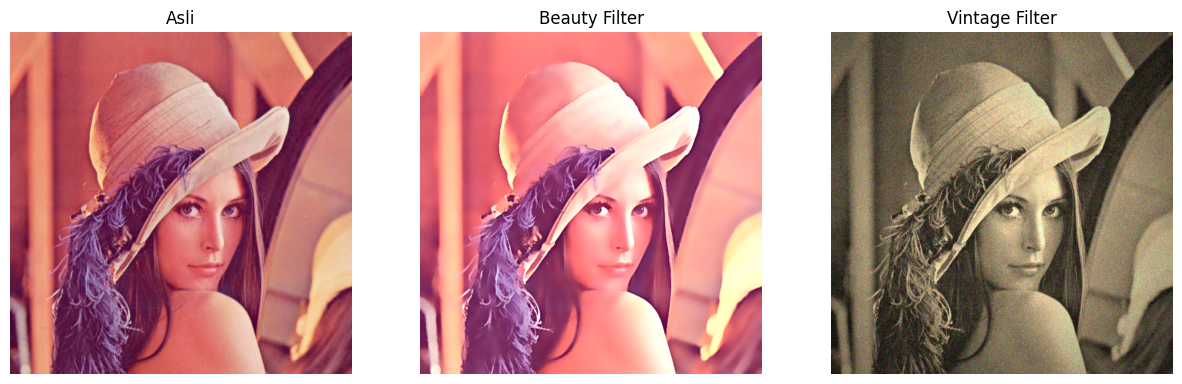

In [ ]:
#PERCOBAAN 4
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def show_side_by_side(images, titles, figsize=(15,5)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
    plt.show()


img = cv.imread("/content/drive/MyDrive/SEMESTER 5/PCVK/Lenna.png")

# 1. Beauty Filter
# Step 1: Smoothing kulit dengan bilateral filter
smooth = cv.bilateralFilter(img, d=15, sigmaColor=75, sigmaSpace=75)

# Step 2: Unsharp masking (pertajam mata/bibir)
gaussian = cv.GaussianBlur(smooth, (0,0), 3)
sharpened = cv.addWeighted(smooth, 1.5, gaussian, -0.5, 0)

# Step 3: Brightness & Contrast
alpha = 1.2   # contrast
beta = 15     # brightness
beauty = cv.convertScaleAbs(sharpened, alpha=alpha, beta=beta)

# 2. Old/Vintage Filter
# Step 1: Sepia tone
sepia_kernel = np.array([[0.272, 0.534, 0.131],
                         [0.349, 0.686, 0.168],
                         [0.393, 0.769, 0.189]])
sepia = cv.transform(img, sepia_kernel)
sepia = np.clip(sepia, 0, 255).astype(np.uint8)

# Step 2: Vignette effect
rows, cols = img.shape[:2]
kernel_x = cv.getGaussianKernel(cols, cols*0.6)
kernel_y = cv.getGaussianKernel(rows, rows*0.6)
kernel = kernel_y * kernel_x.T
mask = kernel / kernel.max()
vignette = np.copy(sepia)
for i in range(3):
    vignette[:,:,i] = vignette[:,:,i] * mask

# Step 3: Noise/Grain
noise = np.random.normal(0, 15, vignette.shape).astype(np.int16)
old_img = np.clip(vignette.astype(np.int16) + noise, 0, 255).astype(np.uint8)

show_side_by_side([img, beauty, old_img],
                  ["Asli", "Beauty Filter", "Vintage Filter"])


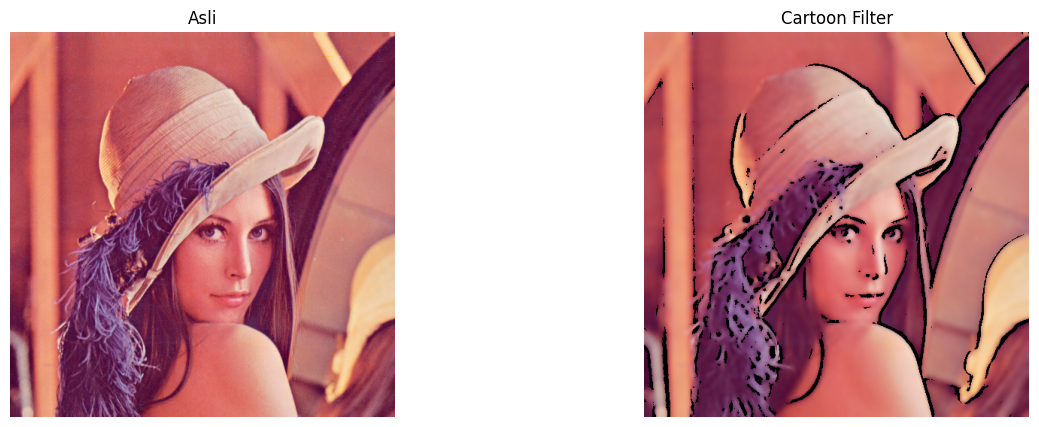

In [ ]:
#PERCOBAAN 5
#Filter Anime / Cartoon
# Step 1: Edge detection (pakai median blur dulu agar gambar menjadi lebih halus)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_blur = cv.medianBlur(gray, 7)
edges = cv.adaptiveThreshold(gray_blur, 255,
                             cv.ADAPTIVE_THRESH_MEAN_C,
                             cv.THRESH_BINARY, 9, 9)

# Step 2: Bilateral filter untuk smoothing warna
color = cv.bilateralFilter(img, d=9, sigmaColor=200, sigmaSpace=200)

# Step 3: Gabungkan (cartoonize)
cartoon = cv.bitwise_and(color, color, mask=edges)

# Tampilkan
show_side_by_side([img, cartoon], ["Asli", "Cartoon Filter"])

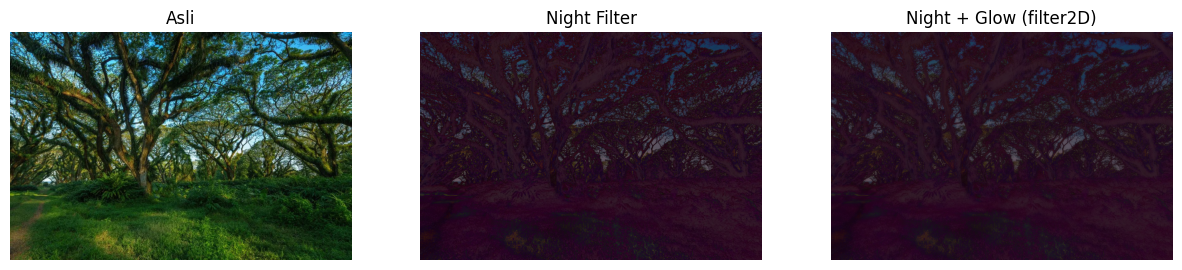

In [ ]:
#PERCOBAAN 6
# Night Filter
img = cv.imread("/content/drive/MyDrive/SEMESTER 5/PCVK/djawatan.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Step 1: Gelapkan (contrast turun, brightness negatif)
night = cv.convertScaleAbs(img, alpha=0.6, beta=-40)

# Step 2: Tambah bias biru
blue_tint = np.full_like(night, (50, 0, 100)) # BGR
night = cv.addWeighted(night, 0.8, blue_tint, 0.2, 0)

# Step 3: Efek glow di area terang dengan filter2D (blur kernel)
kernel = np.ones((15,15), np.float32) / 225
glow = cv.filter2D(night, -1, kernel)

# Kombinasikan asli + glow
night_glow = cv.addWeighted(night, 0.7, glow, 0.3, 0)

show_side_by_side([img, night, night_glow],
                  ["Asli", "Night Filter", "Night + Glow (filter2D)"])

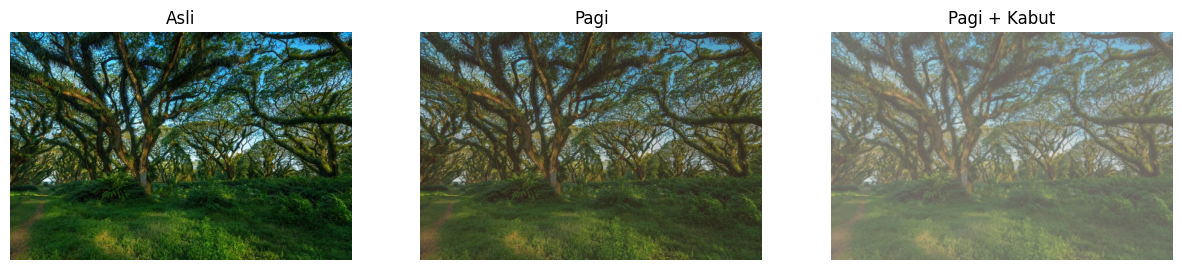

In [ ]:
#PERCOBAAN 7
#Filter Suasana pagi dan Kabut
# Step 1: Kurangi kontras & cerahkan
alpha = 0.9 # contrast
beta = 20 # brightness
soft = cv.convertScaleAbs(img, alpha=alpha, beta=beta)

# Step 2: Tambahkan warm tone (kemerahan / oranye)
warm_tint = np.full_like(soft, (40, 70, 120)) # BGR
pagi = cv.addWeighted(soft, 0.8, warm_tint, 0.2, 0)

# Step 3: Tambahkan haze (kabut tipis) dengan filter2D
# Kernel blur Gaussian-Like untuk menciptakan efek kabut
kernel = cv.getGaussianKernel(3, 3)
kernel = kernel @ kernel.T # jadikan 2D kernel
kabut = cv.filter2D(pagi, -1, kernel)

# tambah layer putih untuk kabut lebih nyata
white_layer = np.full_like(pagi, 255)
kabut = cv.addWeighted(kabut, 0.7, white_layer, 0.3, 0)

show_side_by_side([img, pagi, kabut],
                  ["Asli", "Pagi", "Pagi + Kabut"])